In [113]:
from commonfunctions import *
import cv2  as cv
import imutils
import numpy as np


In [143]:
def calculate_contour_distance(contour1, contour2): # 
    x1, y1, w1, h1 = cv.boundingRect(contour1)
    c_x1 = x1 + w1/2
    c_y1 = y1 + h1/2

    x2, y2, w2, h2 = cv.boundingRect(contour2)
    c_x2 = x2 + w2/2
    c_y2 = y2 + h2/2

    return max(abs(c_x1 - c_x2) - (w1 + w2)/2, abs(c_y1 - c_y2) - (h1 + h2)/2)

def merge_contours(contour1, contour2):
    return np.concatenate((contour1, contour2), axis=0)

def agglomerative_cluster(contours, threshold_distance=5.0):
    current_contours = contours
    while len(current_contours) > 1:
        min_distance = None
        min_coordinate = None

        for x in range(len(current_contours)-1):
            for y in range(x+1, len(current_contours)):
                distance = calculate_contour_distance(current_contours[x], current_contours[y])
                if min_distance is None:
                    min_distance = distance
                    min_coordinate = (x, y)
                elif distance < min_distance:
                    min_distance = distance
                    min_coordinate = (x, y)

        if min_distance < threshold_distance:
            index1, index2 = min_coordinate
            current_contours[index1] = merge_contours(current_contours[index1], current_contours[index2])
            del current_contours[index2]
        else:
            break

    return current_contours


       


In [149]:
def LPD(img,padding=50):
    
    #? Step 1: Edge Detection
   
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = gray[gray.shape[0]*2//5:gray.shape[0],:]
    #show_images([gray])
    gray = cv.GaussianBlur(gray, (3,3), 2)
    img = img[img.shape[0]*2//5:img.shape[0],:]
    
    # The Black Hat operation is the difference between the closing and input image 
    
    rectKern = cv.getStructuringElement(cv.MORPH_RECT, (7,5))
    blackhat = cv.morphologyEx(gray, cv.MORPH_BLACKHAT, rectKern)
    #show_images([blackhat])


    img_thresh = blackhat
    img_thresh[ img_thresh < 50 ] = 0
    img_thresh[ img_thresh >= 50 ] = 255
    #show_images([img_thresh])

    sobel_x = cv.Sobel(img_thresh, cv.CV_64F, 1, 0, ksize=3)  # Gradient in x-direction
    sobel_x = np.absolute(sobel_x)
    maxVal = np.max(sobel_x)
    sobel_x = 255 * ((sobel_x) / (maxVal))
    sobel_x = sobel_x.astype("uint8")
    #show_images([sobel_x])

    
    closeKern = cv.getStructuringElement(cv.MORPH_RECT, (7,7))
    closed_image = cv.morphologyEx(sobel_x, cv.MORPH_CLOSE, closeKern)
    #show_images([closed_image])
    
    
    temp1= cv.erode(closed_image, None, iterations = 2)
    temp1 = cv.dilate(temp1, None, iterations = 3)
    #show_images([temp1])
    tempx= cv.erode(temp1, None, iterations = 2)
    tempx = cv.dilate(tempx, None, iterations = 3)
    #show_images([tempx])
    
    temp2 = cv.erode(tempx, None, iterations = 2)
    temp2 = cv.dilate(temp2, None, iterations = 9)
    #show_images([temp2])
#     temp3 = cv.erode(temp2, None, iterations = 4)
#     temp3 = cv.dilate(temp3, None, iterations = 10)
#     show_images([temp3])
    
    
    img1_thresh = temp2
    img1_thresh[ img1_thresh < 100 ] = 0
    img1_thresh[ img1_thresh >= 100 ] = 255
    show_images([img1_thresh])
    
    
#     contours, _ = cv.findContours(img1_thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#     cv.drawContours(gray, contours, -1, (0, 255, 0), thickness=2)
#     show_images([gray])
    
    
    
    contours, hierarchy = cv.findContours(img1_thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) #get the contours
    merged_contours = []
    copyContours = list(contours)
    merged_contours = agglomerative_cluster(copyContours) # merge contours which is close together
    
    cnts = sorted(merged_contours, key=cv.contourArea, reverse=True)

    for cnt in cnts:
        area = cv.contourArea(cnt)
        if 500 < area < 7000: # filter on the area of the contours 
            print(area)
            peri = cv.arcLength(cnt, True)
            approx = cv.approxPolyDP(cnt, 0.02 * peri, True)
            x, y, w, h = cv.boundingRect(approx)
            ar = w / float(h)
            if (ar>=1.5 and ar<=6):
                cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2) # draw a rect on the cone
                break
    show_images([img])
    
      

        
    

#     if contours:
#         largest_contour = max(contours, key=cv.contourArea)
#         x, y, w, h = cv.boundingRect(largest_contour)
#         center_x = x + (w // 2)
#         center_y = y + (h // 2)
#         crop_width = 150
#         crop_height = 40
#         start_x = max(center_x - (crop_width // 2), 0)
#         start_y = max(center_y - (crop_height // 2), 0)
#         cropped_image = img[start_y:start_y + crop_height, start_x:start_x + crop_width]
#         show_images([cropped_image])
#     else:
#         print("No contours found.")
    
    

['0059.jpg', '0066.jpg', '0270.jpg', '555.jpeg', '213.webp', '0067.jpg', '0060.jpg', '0210.jpg', '123.jpeg', '0010.jpg', '0014.jpg', 'rr.jpeg', '0015.jpg', 'y.jpeg', '0215.png', '99.jpeg', 'uu.jpeg', '688.jpg', '0016.jpg', '22.jpeg', '23 copy.tiff', 'mostafa1.jpeg', '4.png', '32.jpeg', '0126.jpg', '111.jpeg', '0109.jpg']


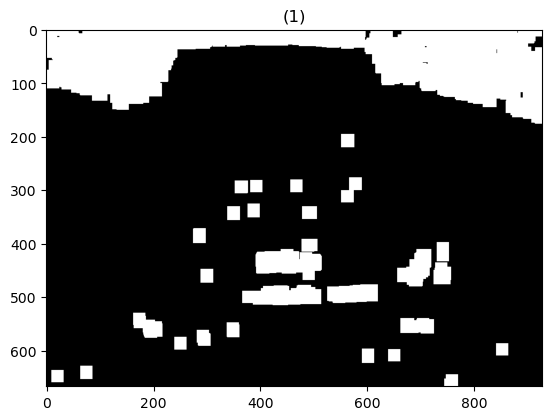

5731.0


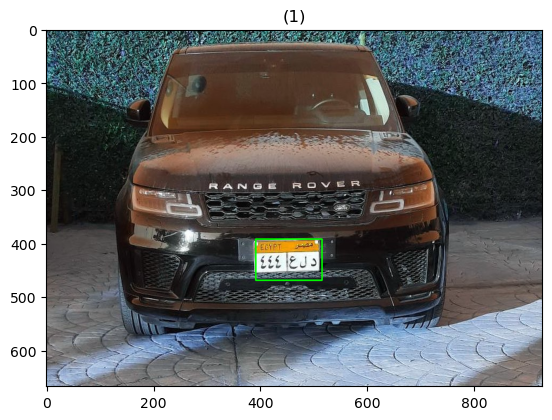

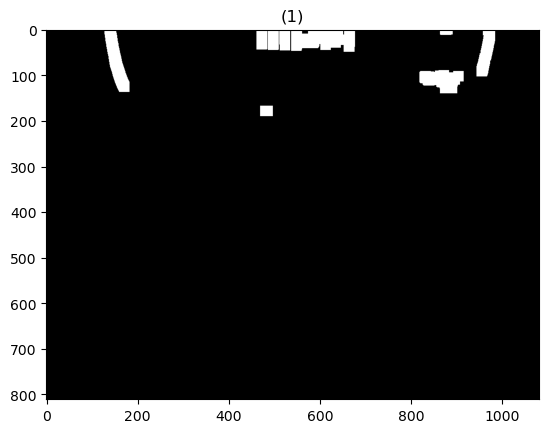

3737.5
3529.0


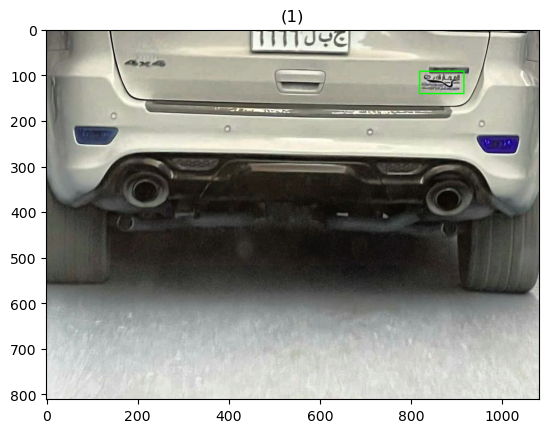

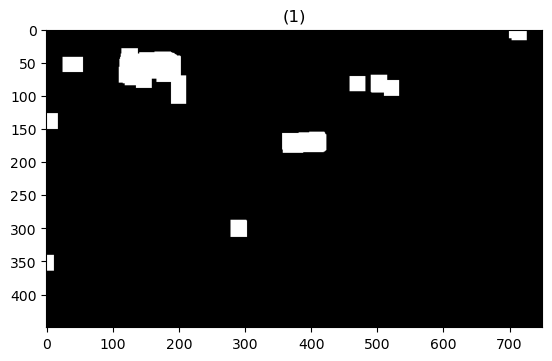

5239.5
1930.0


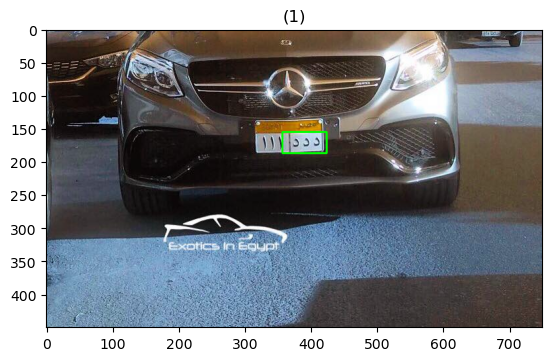

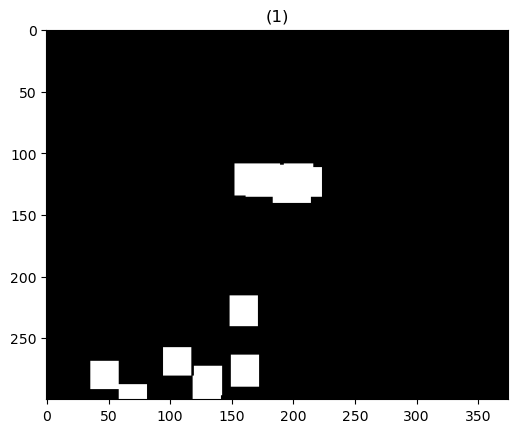

1939.0


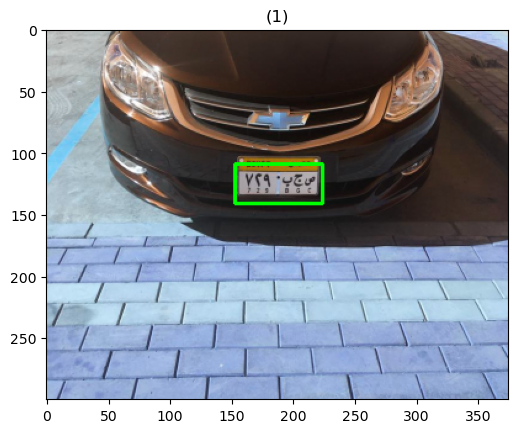

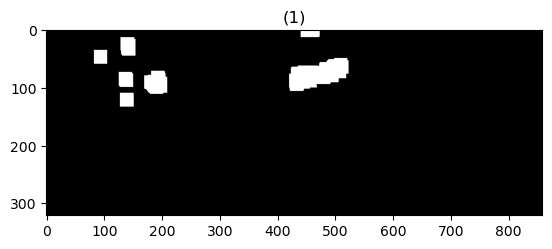

3817.5


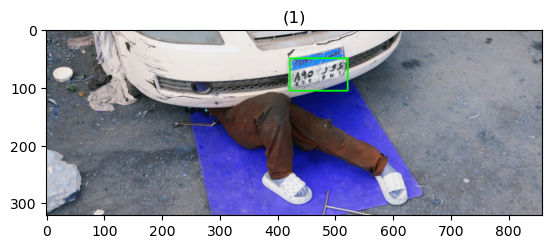

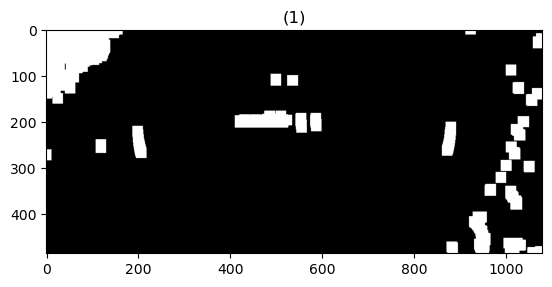

6488.0
3770.5


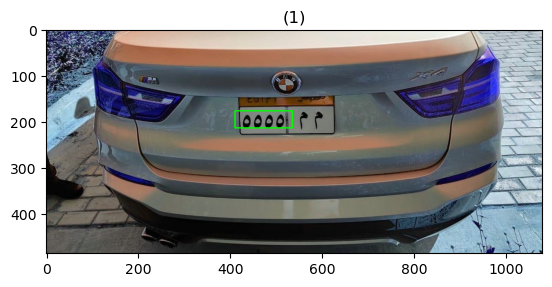

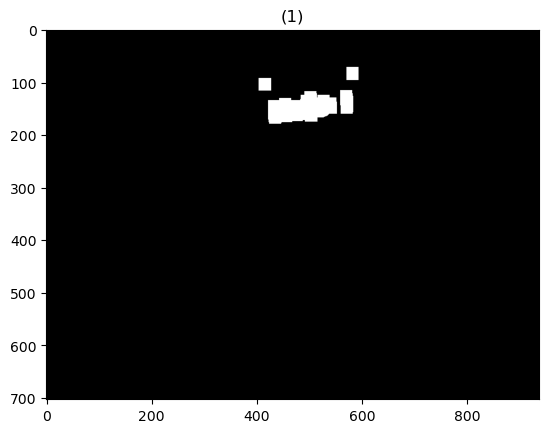

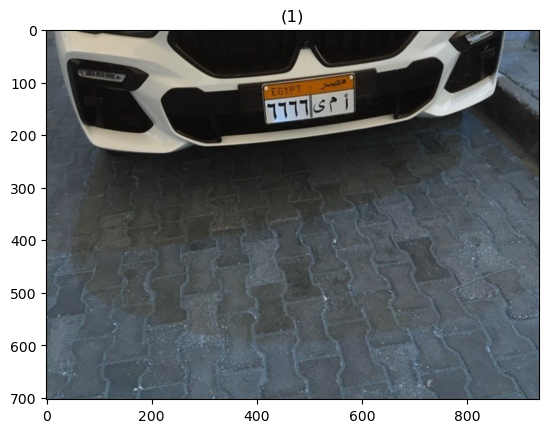

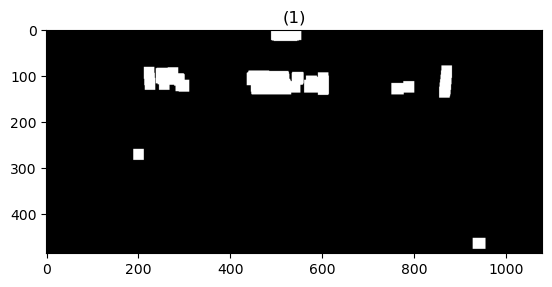

3955.0


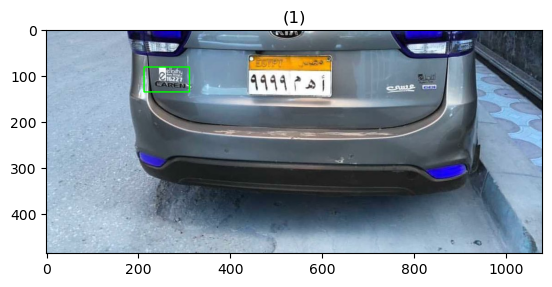

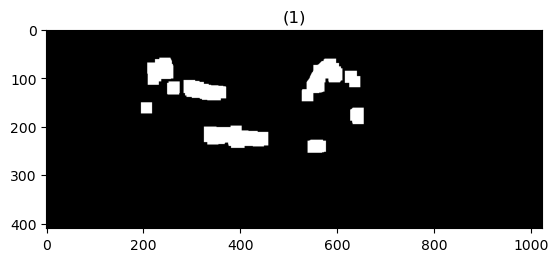

4636.0
4533.5


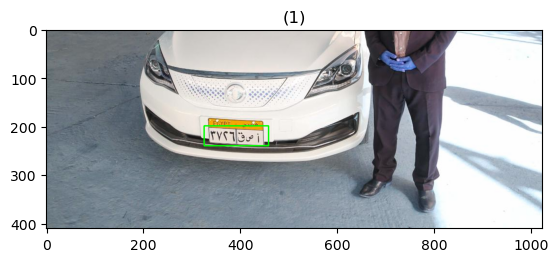

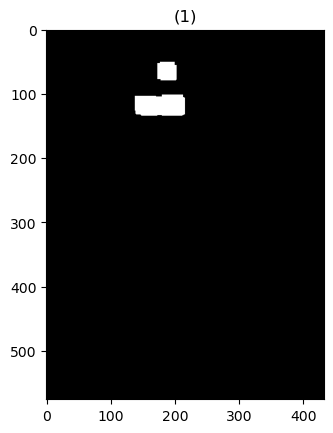

2323.0


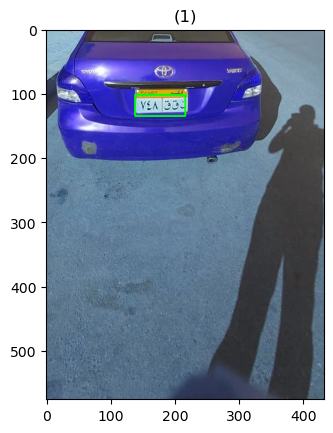

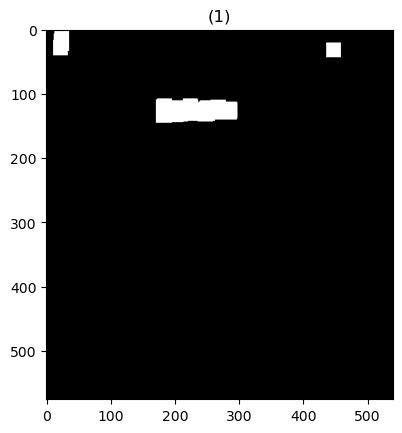

4094.5


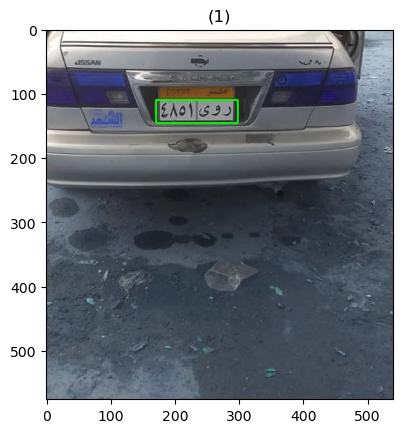

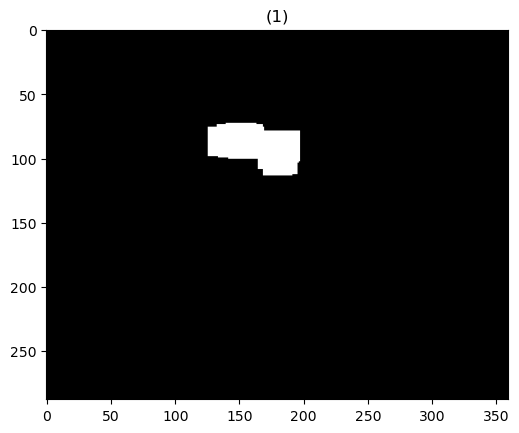

2066.0


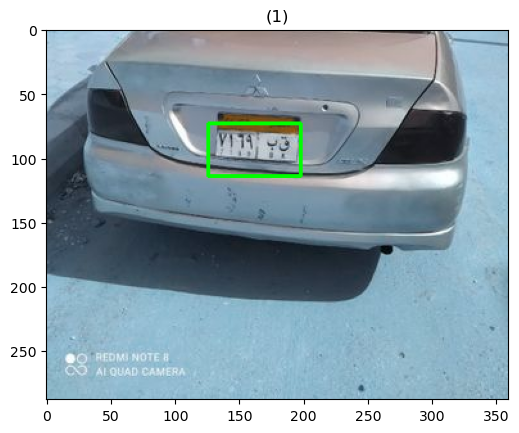

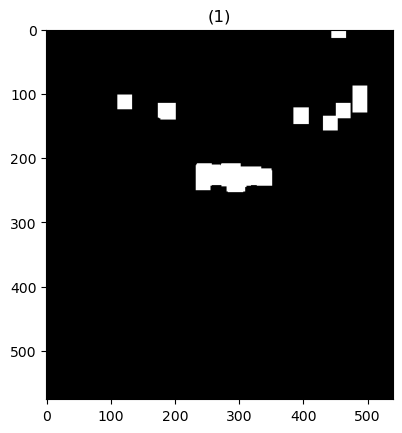

4100.5


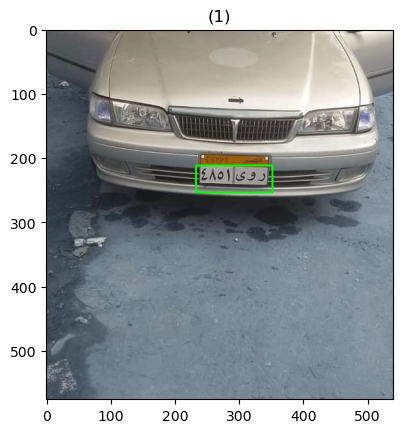

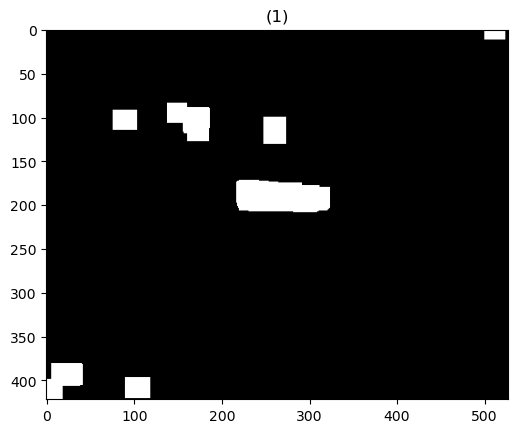

3360.5


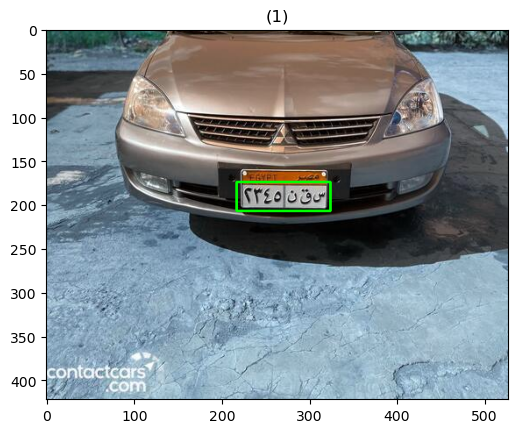

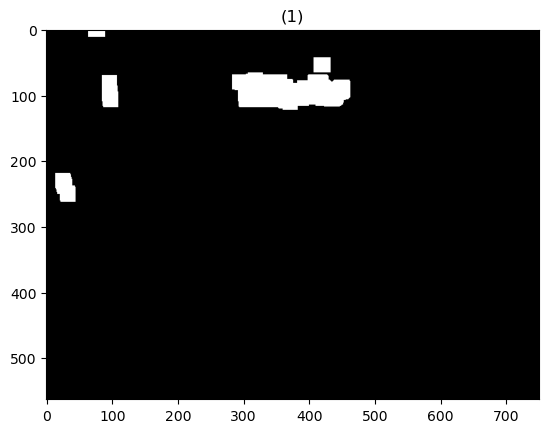

1102.0
1076.0


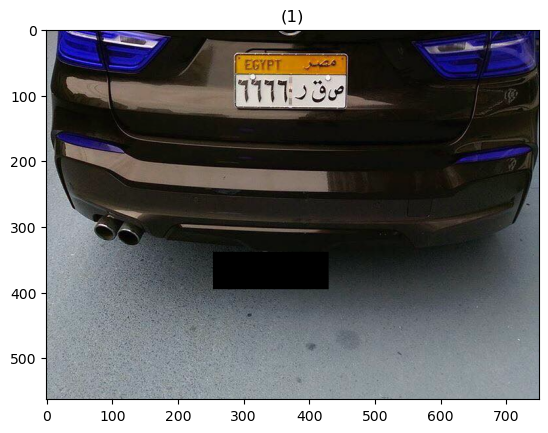

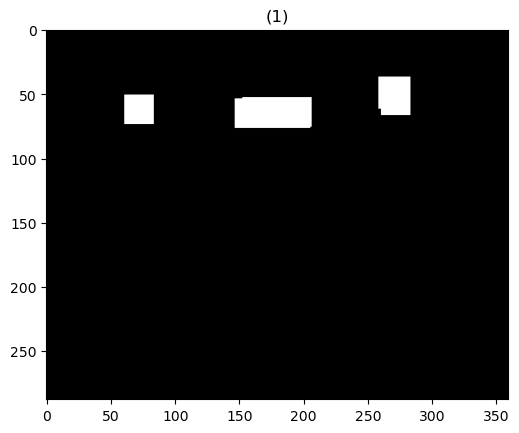

1351.0


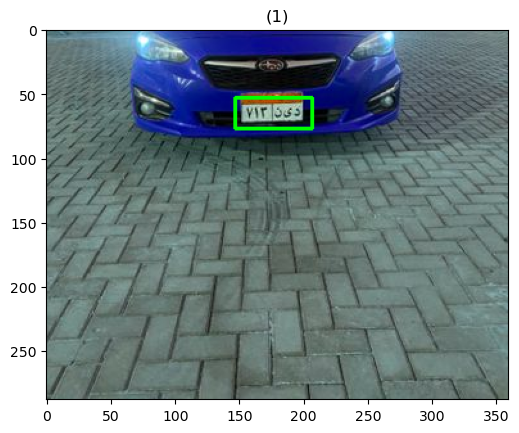

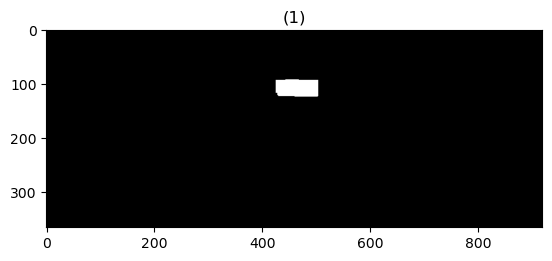

2310.5


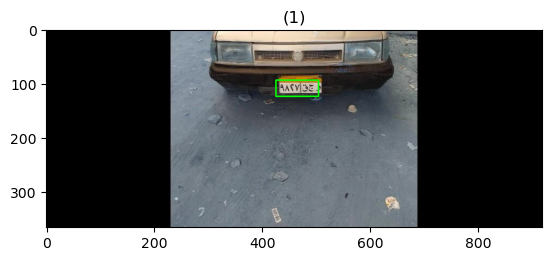

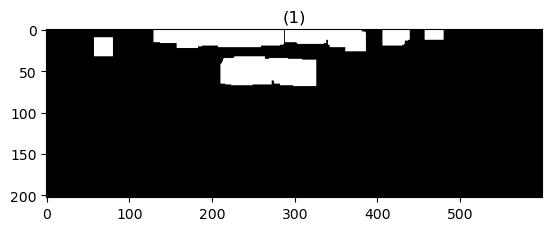

568.0


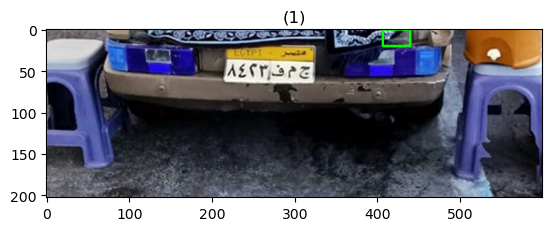

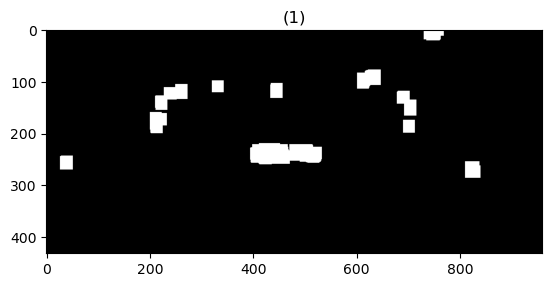

4783.0


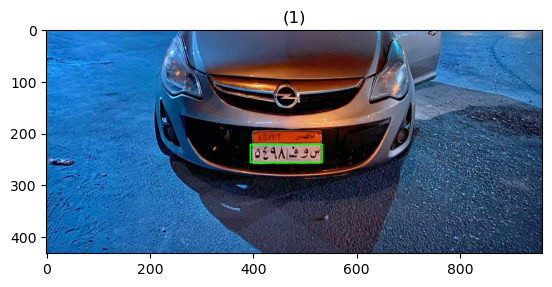

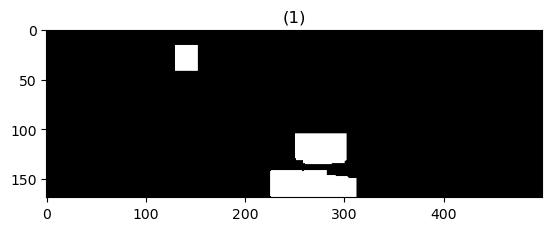

3524.0
550.0


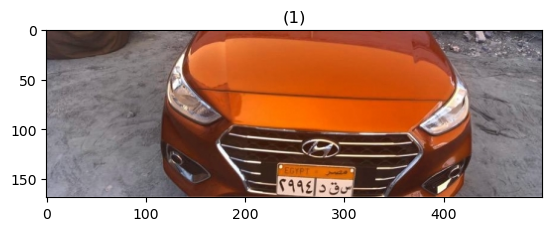

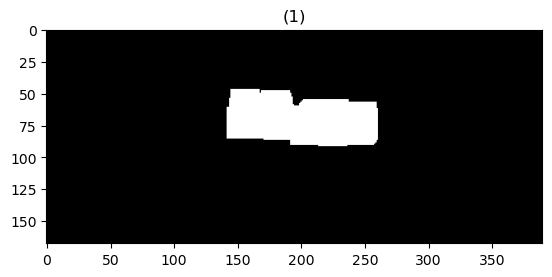

4176.5


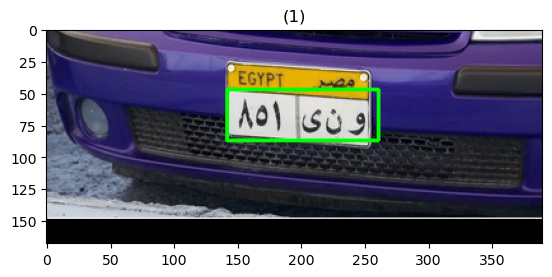

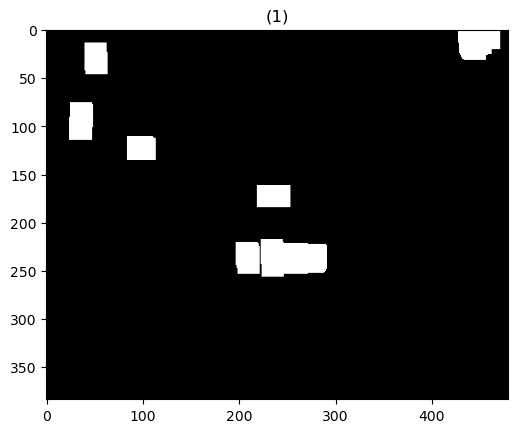

2960.0


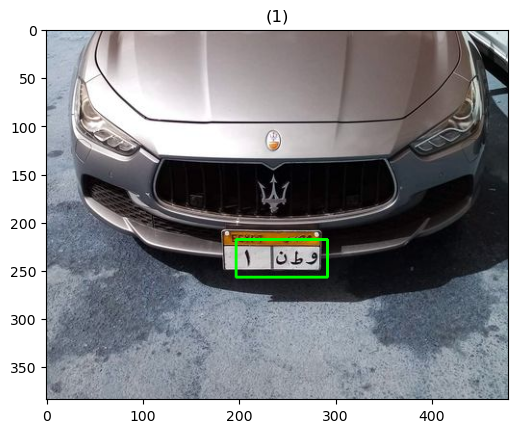

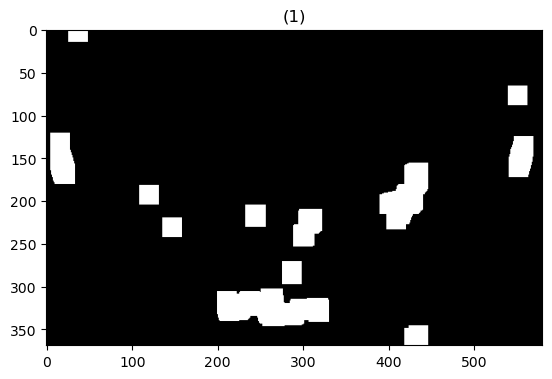

4766.0


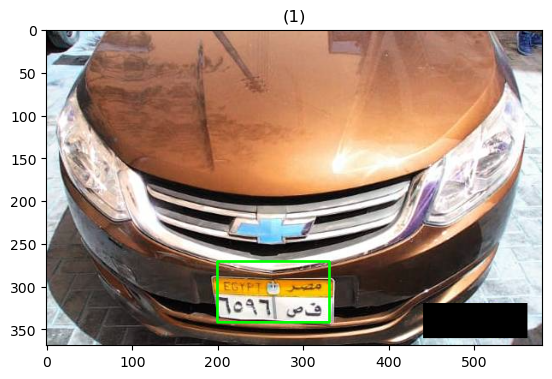

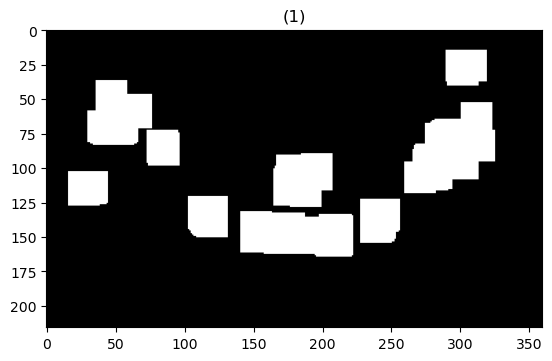

2242.0
705.0


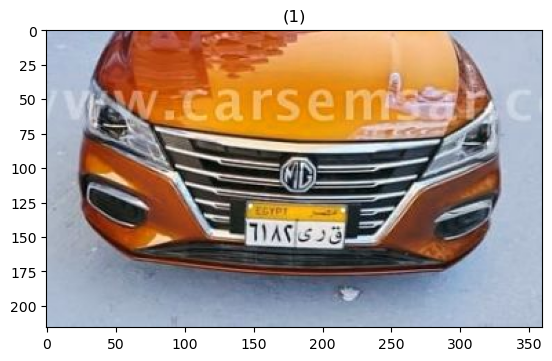

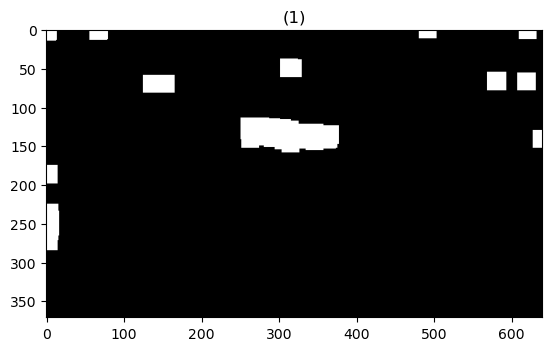

4442.5


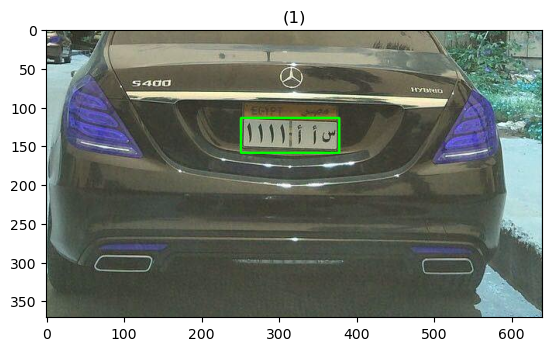

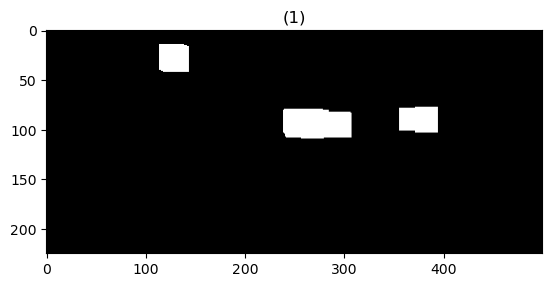

1843.5


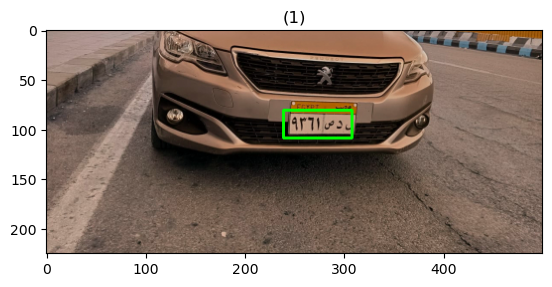

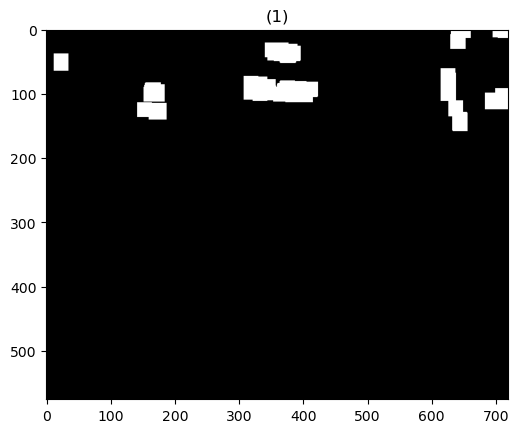

3753.0


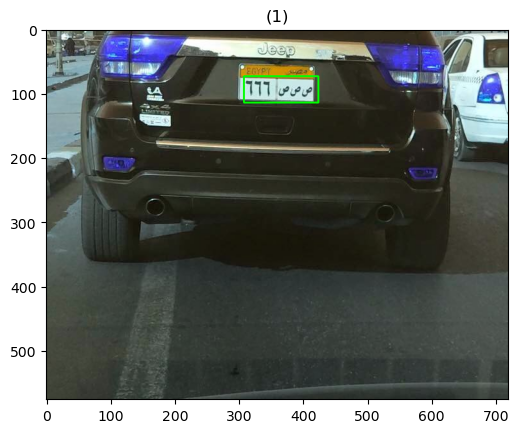

In [150]:
import os
images = os.listdir('images')
print(images)
for image in images:
    LPD(cv.imread('images/'+image))

# LPD(cv.imread('images/23.png'))


